<a href="https://colab.research.google.com/github/Srujan4812/ML_LAB/blob/main/1BM23CS340_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
housing = pd.read_csv(url)

# Display the first 10 rows
print("First 10 rows of the dataset:")
display(housing.head(10))

# Display info of the dataset
print("\nDataset Summary Info:")
housing.info()

First 10 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY



Dataset Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Summary Statistics for Numerical Features:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


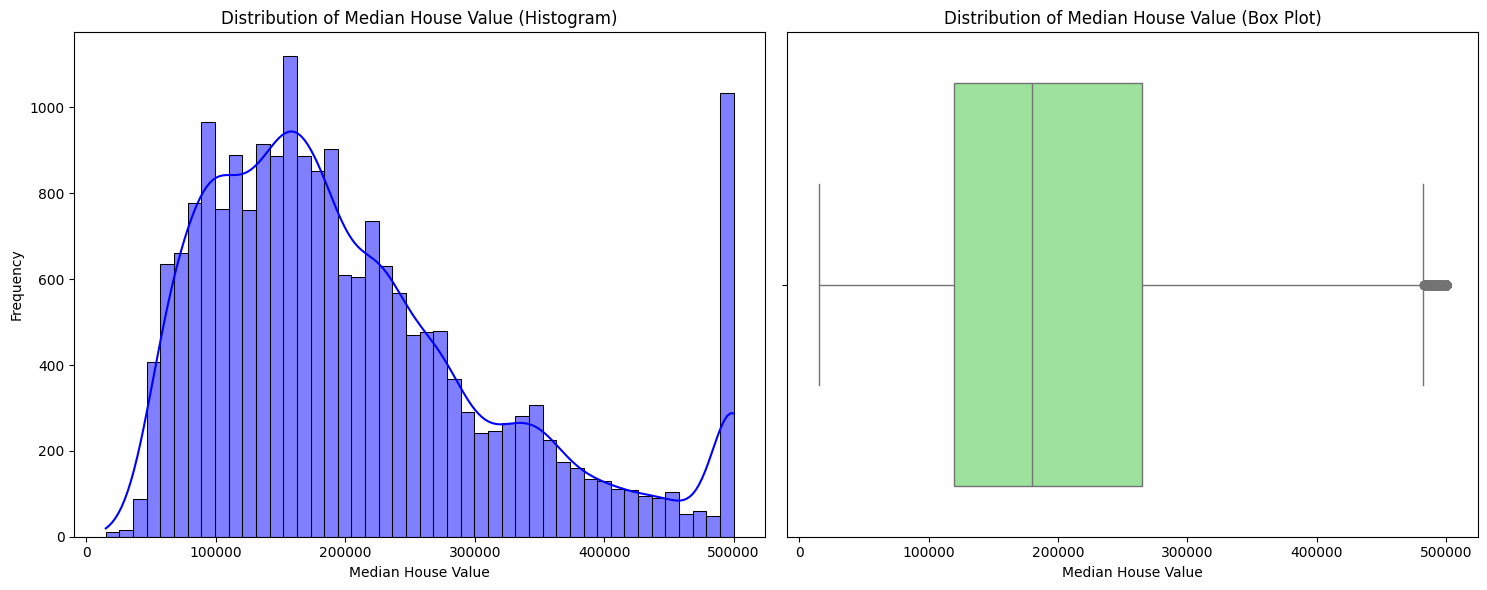

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate summary statistics for numeric columns
print("Summary Statistics for Numerical Features:")
display(housing.describe())

# Visualize the distribution of the target variable 'median_house_value'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with KDE
sns.histplot(housing['median_house_value'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Median House Value (Histogram)')
axes[0].set_xlabel('Median House Value')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(x=housing['median_house_value'], ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Median House Value (Box Plot)')
axes[1].set_xlabel('Median House Value')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# 1. Calculate missing values and their percentages
missing_values = housing.isnull().sum()
missing_percentage = (missing_values / len(housing)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print("Missing Value Analysis:")
display(missing_df)

# 2. Impute missing values in 'total_bedrooms' with the median
median_bedrooms = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median_bedrooms)

# 3. Apply one-hot encoding to 'ocean_proximity'
housing = pd.get_dummies(housing, columns=['ocean_proximity'])

# 4. Verify the changes
print("\nUpdated Dataset Info after Imputation and Encoding:")
housing.info()
print("\nFirst 5 rows of the updated dataset:")
display(housing.head())

Missing Value Analysis:


,Missing Values,Percentage (%)
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000



Updated Dataset Info after Imputation and Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 n

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Create a temporary categorical column 'income_cat' for stratified sampling
# This is done before scaling to use the specified bins on the original scale
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# 2. Identify numerical columns to apply MinMaxScaler
# We include all float columns; boolean columns are already in [0, 1] range
num_attribs = housing.select_dtypes(include=[np.number]).columns

# 3. Apply MinMaxScaler to the numerical columns
scaler = MinMaxScaler()
housing[num_attribs] = scaler.fit_transform(housing[num_attribs])

# 4. Perform Stratified Splitting into 80% train and 20% test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# 5. Drop the temporary 'income_cat' column from both sets
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# 6. Verify and print the shapes of the resulting sets
print(f'Training set shape: {strat_train_set.shape}')
print(f'Testing set shape: {strat_test_set.shape}')
print('\nScaled Training Data Preview:')
display(strat_train_set.head())

Training set shape: (16512, 14)
Testing set shape: (4128, 14)

Scaled Training Data Preview:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.287849,0.635494,0.549020,0.098454,0.123526,0.062614,0.115935,0.115426,0.117734,False,True,False,False,False
15502,0.709163,0.058448,0.117647,0.135256,0.132526,0.056392,0.126131,0.402574,0.545567,False,False,False,False,True
2908,0.528884,0.300744,0.843137,0.041101,0.047952,0.018610,0.049170,0.163798,0.139589,False,True,False,False,False
14053,0.719124,0.022317,0.450980,0.047688,0.080385,0.025085,0.079263,0.119067,0.201032,False,False,False,False,True
20496,0.562749,0.184910,0.509804,0.089882,0.100093,0.051403,0.095215,0.275617,0.460413,True,False,False,False,False


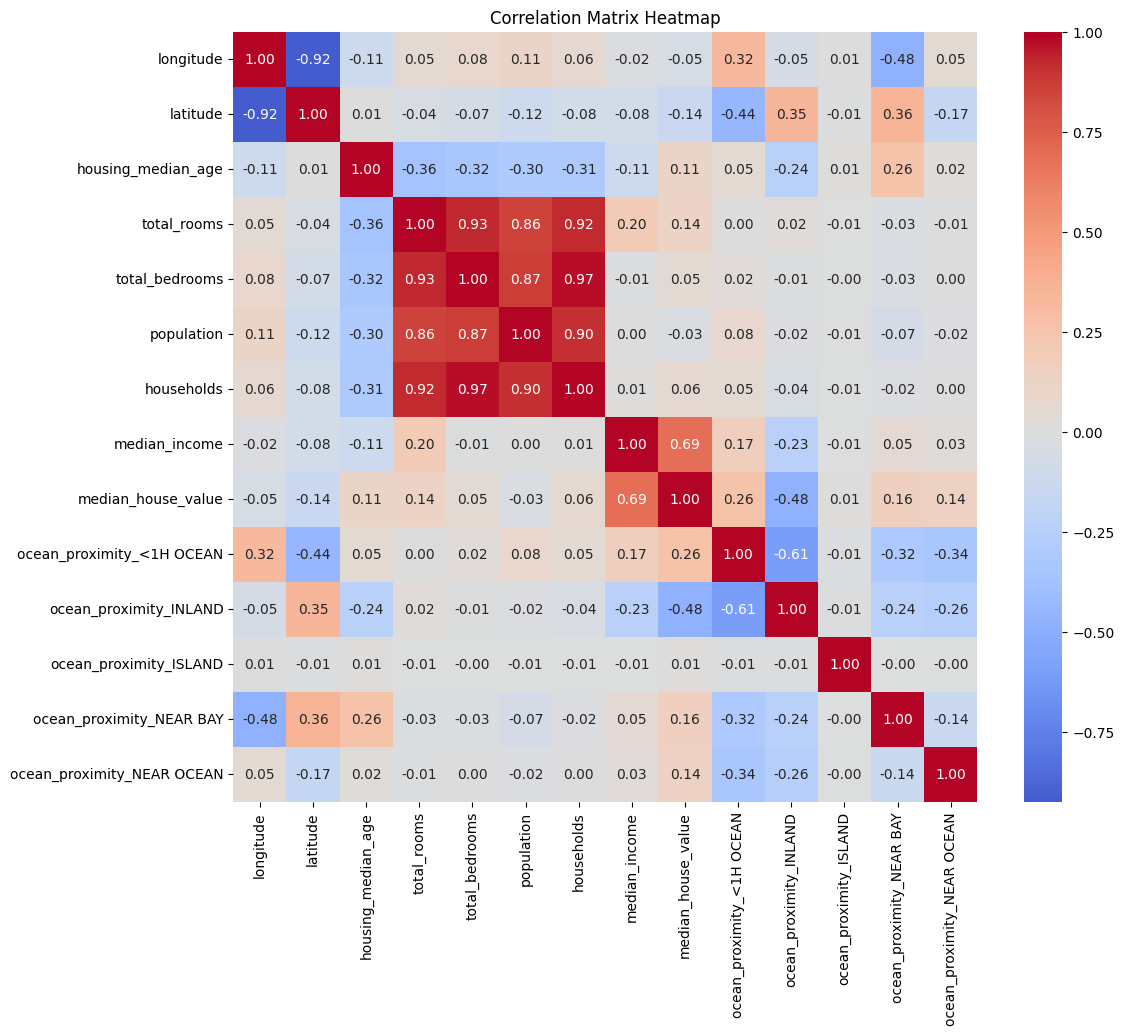

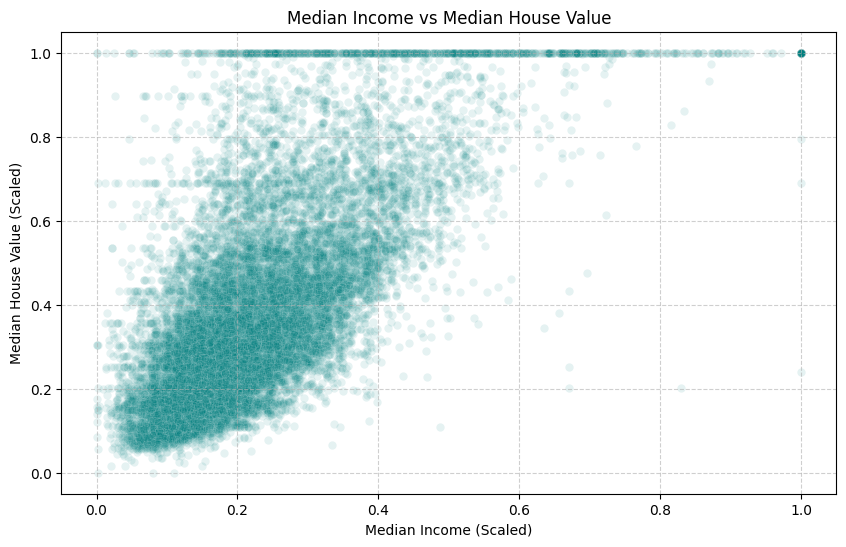

Correlation of features with Median House Value:
median_house_value            1.000000
median_income                 0.687151
ocean_proximity_<1H OCEAN     0.259521
ocean_proximity_NEAR BAY      0.158691
ocean_proximity_NEAR OCEAN    0.137332
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047732
ocean_proximity_ISLAND        0.013708
population                   -0.026882
longitude                    -0.047466
latitude                     -0.142673
ocean_proximity_INLAND       -0.482853
Name: median_house_value, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compute correlation matrix
corr_matrix = strat_train_set.corr()

# 2. Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Scatter plot: median_income vs median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=strat_train_set, x='median_income', y='median_house_value', alpha=0.1, color='teal')
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income (Scaled)')
plt.ylabel('Median House Value (Scaled)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display the top correlations specifically for the target
print("Correlation of features with Median House Value:")
print(corr_matrix['median_house_value'].sort_values(ascending=False))